Notes by: **Noman Iqbal** => **thenomaniqbal@gmail.com** 

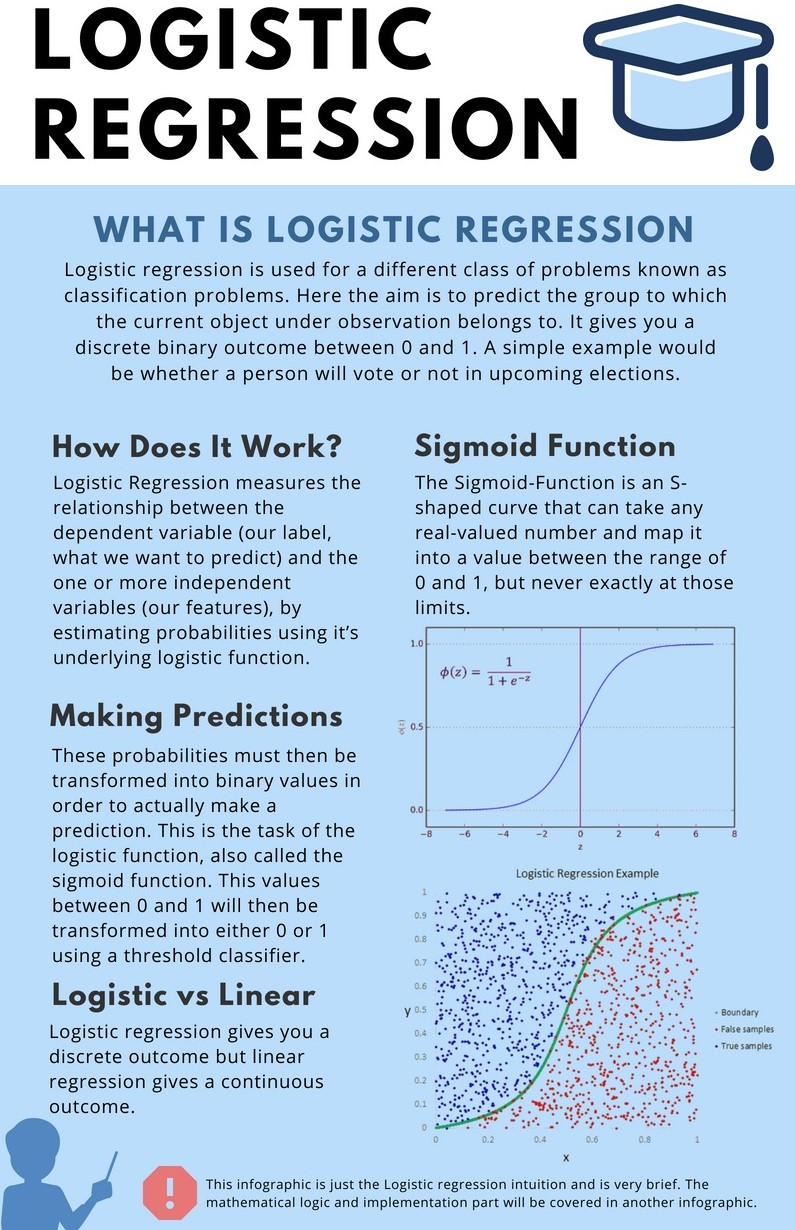

# Types of Logistic Regression
 
**Binomial:** This means that there can be only two possible types of the dependent variables, such as 0 or 1, Yes or No, etc.  
**Multinomial:** This means that there can be 3 or more possible unordered types of the dependent variable, such as "cat", "dogs", or "sheep"  
**Ordinal:** This means that there can be 3 or more possible ordered types of dependent variables, such as "low", "Medium", or "High".  

**Linear and Logistic Regression**  
Linear Regression is similar to Logistic Regression but different.  
Linear Regression assumes that there is a linear relationship between dependent and independent variables. It uses the line of best fit that describes two or more variables. The aim of Linear Regression is to accurately predict the output for the continuous dependent variable.  
However, Logistic regression predicts the probability of an event or class that is dependent on other factors, therefore the output of Logistic Regression always lies between 0 and 1.  

# 1. Simple implementation

## Social network dataset

In [1]:
# Step 1 | Data Pre-Processing
# Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv(r'Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
print("dimension of data: {}".format(dataset.shape))
print("n dimentions of data: {}".format(dataset.ndim))
print("size of data: {}".format(dataset.size))
dataset.Purchased.value_counts()

dimension of data: (400, 5)
n dimentions of data: 2
size of data: 2000


0    257
1    143
Name: Purchased, dtype: int64

In [3]:
dataset.isnull().values.any()

False

In [4]:
# ignoring UserId, and Gender column
X = dataset.iloc[:, [2, 3]].values
# just the Purchased column
y = dataset.iloc[:, 4].values

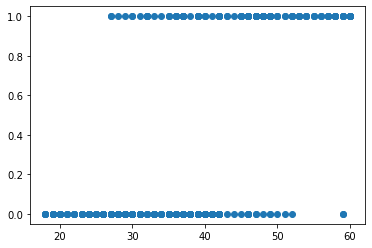

In [5]:
# Visualizing the dataset by Age and Purchased
plt.scatter(dataset['Age'], dataset['Purchased'])
plt.show()

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
# Step 2 | Logistic Regression Model
# The library for this job which is going to be the linear model library and it is called linear 
# because the logistic regression is a linear classifier which means that since we're in two
# dimensions, our two categories of users are going to be separated by a straight line.
# Then import the logistic regression class. Next we will create a new object from this class which 
# is going to be our classifier that we are going to fit on our training set.

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Step 3 | Predection
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Step 4 | Evaluating The Predection
# We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred) #Generate confusion matrix
print(cm) # print confusion_matrix

[[65  3]
 [ 8 24]]


This Confusion Matrix tells us that there were 89 correct predictions and 11 incorrect ones, meaning the model overall accomplished an 89% accuracy rating. This is very good and there are many ways to improve the model by parameter tuning and sample size increasing, but those topics are outside the scope of this project.

In [8]:
# print classification report, displays the accuracy, recall rate, F1 value and other information of each class in the report.
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



In [9]:
print(y_pred[:20])
print(y_test[:20])

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


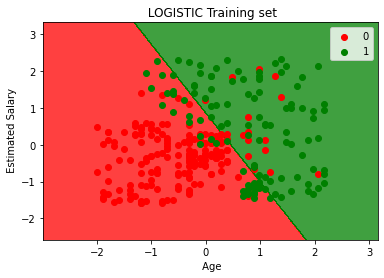

In [10]:
#Visualization
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
#X,Y=np. meshgrid(x,y): The input x, y is the horizontal and vertical coordinate column vector of the grid point, 
# and the output X, Y is the coordinate matrix
X1,X2=np. meshgrid(np. arange(start=X_set[:,0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                   np. arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))
#contourfDrawing contour lines
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np. unique(y_set)):
    #scatterDrawing a scatter chart
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c = ListedColormap(('red','green'))(i), label=j)

plt.title(' LOGISTIC Training set')
plt.xlabel(' Age')
plt.ylabel(' Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


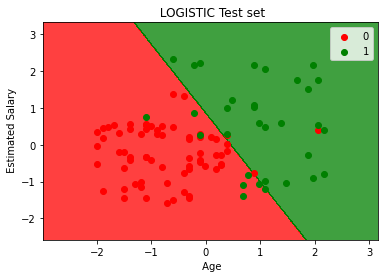

In [11]:
X_set,y_set=X_test,y_test
X1,X2=np. meshgrid(np. arange(start=X_set[:,0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                   np. arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np. unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c = ListedColormap(('red','green'))(i), label=j)

plt.title(' LOGISTIC Test set')
plt.xlabel(' Age')
plt.ylabel(' Estimated Salary')
plt.legend()
plt.show()

---

# 2. A more complex implementation and Explination

Logistic regression follows a beautiful procedure to learn from data. To learn means:  
**Weight:** We define a weight value (parameter) for each feature (column) in the dataset.  
**Linear Predictor (score):** We compute weighted sum for each data point in the dataset.   
now, lets just suppose we have 30 features (columns) in a dataset, we will have 30 weights $[ W1,W2…W30 ]$. We compute the score (weighted sum) for each data point as follows.

    score=W0+(W1∗h1(xi))+(W2∗h2(xi))+...+(W30∗h30(xi))  
         =WT h(xi)

The hypothesis function in logistic regression is given as:
 $h_\theta(x)$ = $g(\theta^T(x))$  
Notice we have $W_0$ with no coefficient which is called the bias or intercept which must be learnt from the training data.**$h(xi)$ is the feature vector for that single data point which has $[h1(xi),h2(xi)…h30(xi)]$**.  
As we have numeric values, the score for each data point might fall within a range $[−∞,+∞]$. Recall that our aim is to predict “given a new data point, tell me whether it’s malignant (0) or benign (1) in case of cancer dataset”. This means, prediction from the ML model must be either 0 or 1.
How are we going to achieve this? The answer is link function(sigmoid function). 

Predict y=1 if $h_\theta(x)$ > 0.5 when $\theta$ transpose x > 0 while predict y=0 if $h_\theta(x)$ < 0.5 when $\theta$  transpose $x < 0$  		

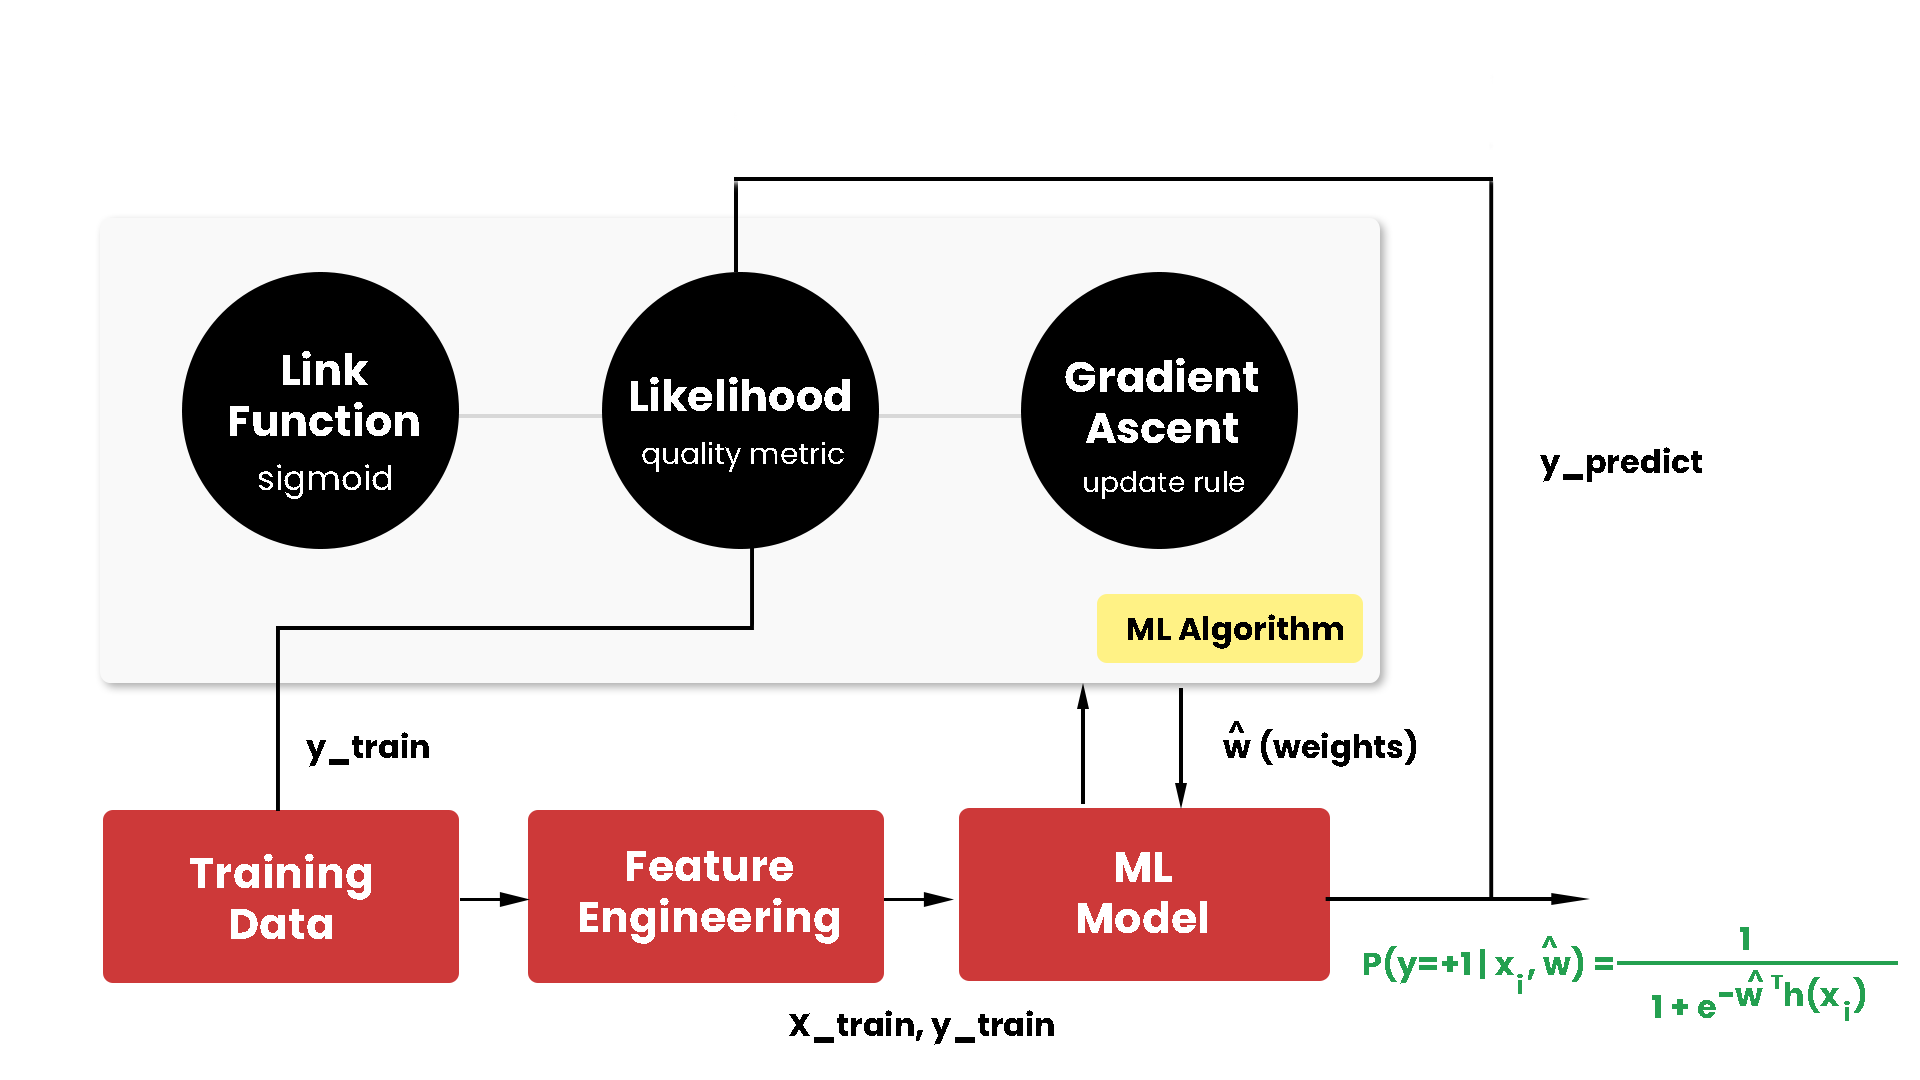

**Link Function(sigmoid function):** We use a link function to transform that weighted sum to the probability range [0,1]. 
If you give any input to a link function (say sigmoid), it transforms that input value to a range [0,1]. In our case, anything below 0.5 is assumed to be malignant-(of a disease) very virulent or infectious. (0), and anything above or equal to 0.5 is assumed to be benign-(of a disease) not harmful in effect. (1).  

                                                Sigmoid function
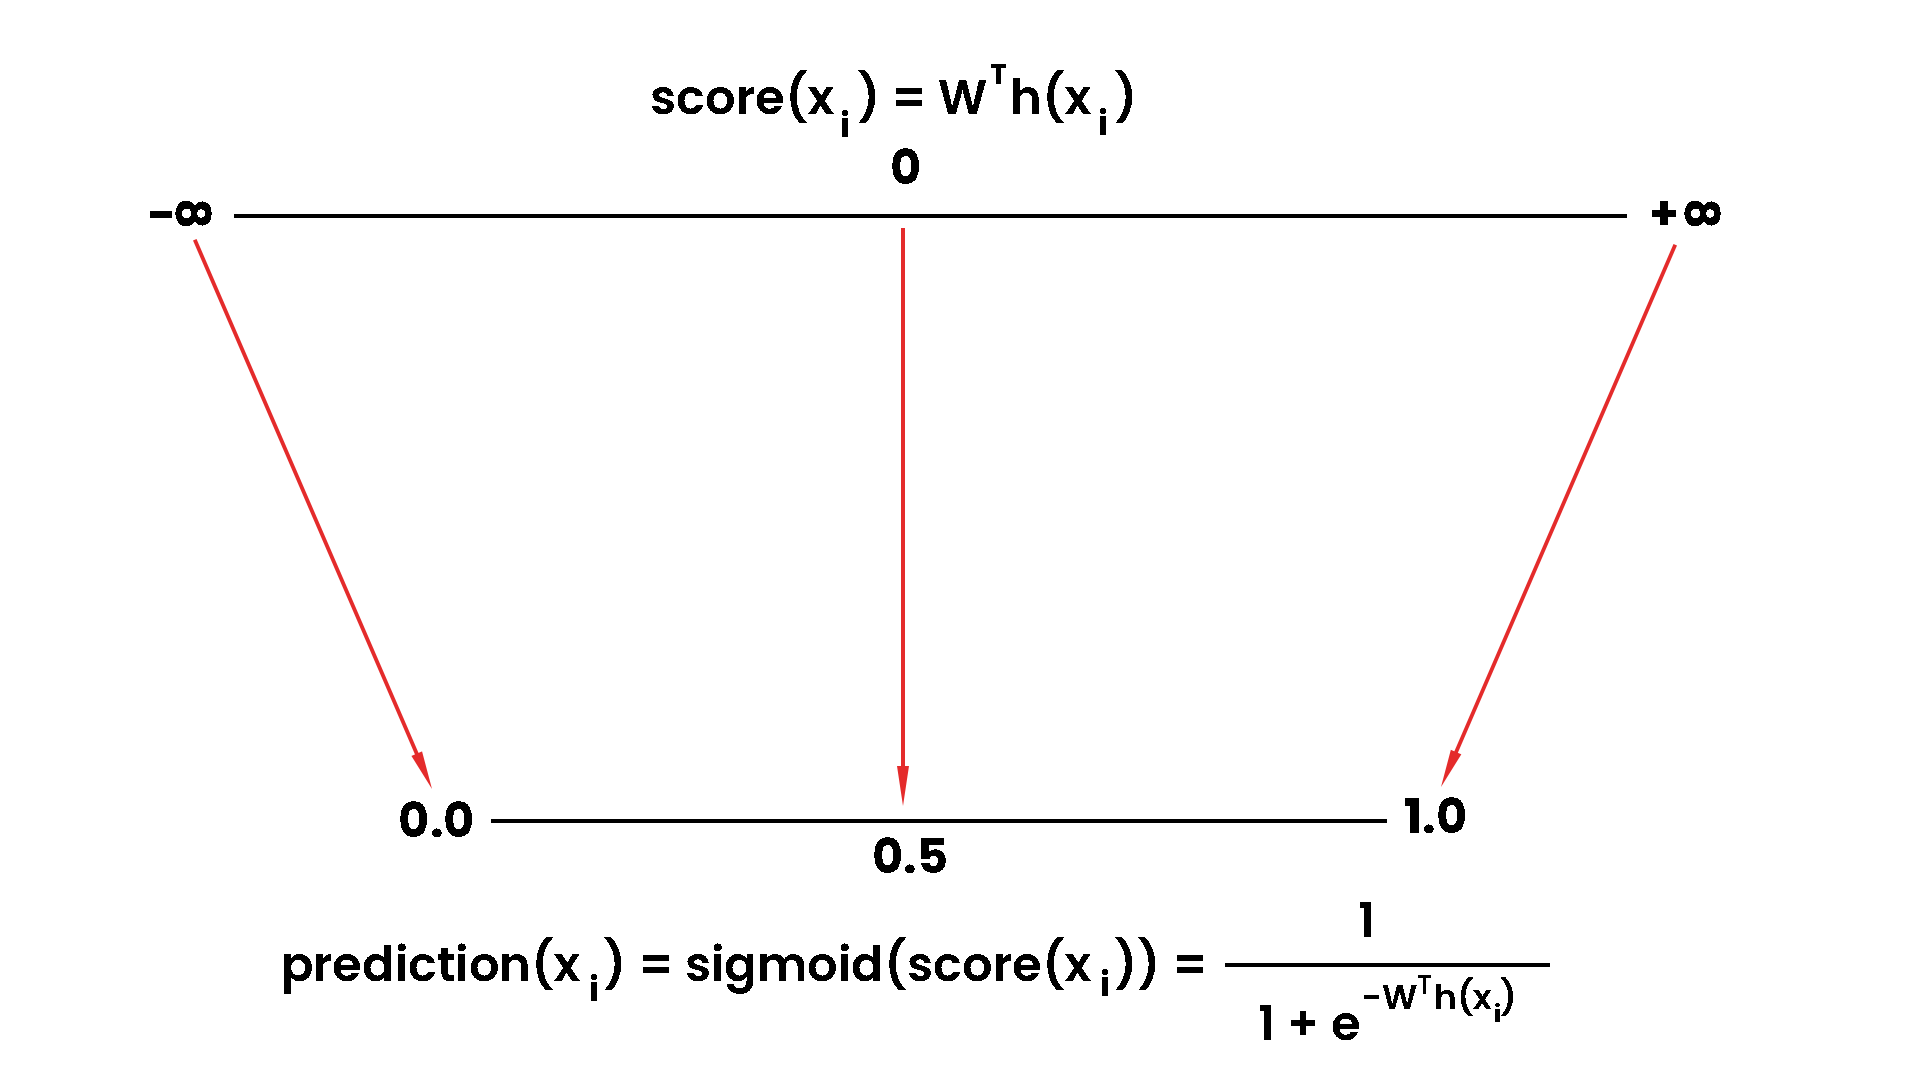

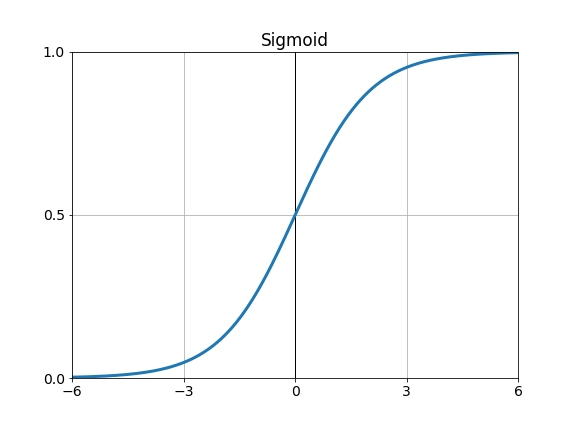

**Log-Likelihood:** We use the log-likelihood function as the quality metric to evaluate the prediction of the model i.e., 
how well the model has predicted y_predict when compared with ground truth y_train.  

                                                         Log-Likelihood
features, weights and score correspond to the matrices shown in the image below.

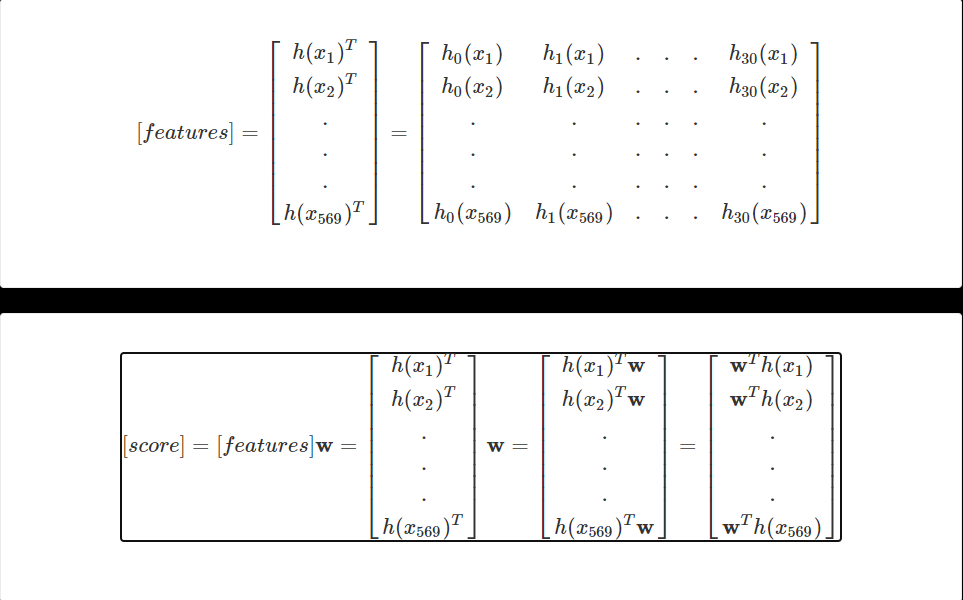

But wait! how will the output value of this link function be the same as the ground truth value for a particular data point ? It can’t be as we are randomizing the weights for the features which will throw out some random value as the prediction.  
The whole point in learning algorithm is to adjust these weights based on the training data to arrive at a sweet spot that makes the ML model have low bias and low variance.

**Gradient Ascent:** We use gradient ascent algorithm to update the weights (parameters) by trying to maximize the likelihood.  

**Prediction:** We take these learned weights and make predictions when new data point is given to the model.  

**Training the classifier** = Learning the weight coefficients (with low bias and low variance).
How do we adjust these weights? We need to define a quality metric that compares the output prediction of the ML model with the original ground truth class value.
After evaluating the quality metric, we use gradient ascent algorithm to update the weights in a way that the quality metric reaches a global optimum value. Interesting isn’t it?

**Compute Likelihood**:  
How do we measure “how well the classifier fits the training data”? Using likelihood. We need to choose weight coefficients w that maximizes likelihood.  
For a binary classification problem, it turns out that we can use log-likelihood as the quality metric which makes computations and derivatives simpler.  
After picking the log-likelihood function, we must know it’s derivative with respect to a weight coefficient so that we can use gradient ascent to update that weight.  
then, We define the below function to compute log-likelihood. Notice that we sum over all the training examples.   

**Compute Derivative**: Once we have the log-likelihood equation, we can compute its derivative with respect to a single weight coefficient.  
We find the derivative of log-likelihood with respect to each of the weight coefficient w which in turn depends on its feature column.  
Notice that we sum over all the training examples, and the derivative that we return is a single number.  

**Gradient Ascent**: Now, we have all the ingredients to perform gradient ascent.
Think of gradient ascent similar to hill-climbing. To reach the top of the hill (which is the global maximum), we choose a parameter called learning-rate. This defines the step-size that we need to take each iteration before we update the weight coefficients.

* The steps that we will perform in gradient ascent are as follows.

    * Initialize weights vector w to random values or zero using np.zeros().  
    * Predict the class probability $P(yi=+1|xi,w)$ for all training examples using predict_probability function and save to a variable named predictions. The shape of this variable would be y_train.shape.  
    * Calculate the indicator value for all training examples by comparing the label against +1 and save it to a variable named indicators. The shape of this variable would also be y_train.shape.  
    * Calculate the errors as the difference between indicators and predictions and save it to a variable named errors.
    * Important step: For each jth weight coefficient, compute it’s derivative using feature_derivative function with the jth column of features. Increment the jth coefficient using lr∗derivative where lr is the learning rate for this algorithm which we handpick.  
    * Do steps 2 to 5 for epochs (which means reducing the error between actual output and predicted output) times (number of iterations) and return the learned weight coefficients.  
    
epoch is the term used to denote the number of iterations involved during the training process of a neural network.

**Split the dataset**: To test our classifier’s performance, we will split the original dataset into training and testing.   We choose a test_size parameter value to split the dataset into train and test using scikit-learn’s train_test_split function.

**Train the classifier**: As we already learnt, training the classifier means learning the weight coefficients. To train the classifier, we Add intercept or bias to the feature matrix. Initialize the weight coefficients to zeros. Handpick the hyper-parameters learning rate and epochs. Use logistic_regression() function that we have just built and pass in the ingredients.  

**Test the classifier**
To make predictions using the trained classifier, we use X_test data (testing data), learned_weights and predict_probability() function.  
To find the accuracy between ground truth class values y_test and logistic regression predicted class values predictions, we use scikit-learn’s accuracy_score() function.  

**Reduce Overfitting**
Overfitting is a mandatory problem that we need to solve when it comes to machine learning. After training, we have the learned weight coefficients which must not overfit the training dataset.  

When the decision boundary traced by the learned weight coefficients fits the training data extremely well, we have this overfitting problem. Often, overfitting is associated with very large estimated weight coefficients. This leads to overconfident predictions which is not very good for a real-world classifier.  

To solve this, we need to measure the magnitude of weight coefficients. There are two approaches to measure it.  

L1 norm: Sum of absolute value  

$∥w∥1=|w0|+|w1|+|w2|…+|wN|$   

L2 norm: Sum of squares  

$\lVert \mathbf w \rVert _2^2 = \mathbf w_0^2 + \mathbf w_1^2 + \mathbf w_2^2 … + \mathbf w_N^2$

**L2 Regularization**
We will use L2 norm (sum of squares) to reduce overshooting weight coefficients. It turns out that, instead of using likelihood function alone as the quality metric, what if we subtract $\lambda \lVert \mathbf w \rVert _2^2$ from it, where $λ$ is a hyper-parameter to control bias-variance tradeoff due to this regularization.  

So, our new quality metric with regularization to combat overconfidence problem would be $l(w) - \lambda \lVert \mathbf w \rVert _2^2$  

Large $λ$: High bias, low variance.  
Small $λ$: Low bias, high variance.  
Recall to perform gradient ascent, we need to know the derivative of quality metric to update the weight coefficients.   Thus, the new derivative equation would be  
$\frac{\partial l(\mathbf w)}{\partial \mathbf w_j} - 2 \lambda \mathbf w_j$  
Let’s understand the regularization impact on penalizing weight coefficients.  

If $wj>0$, then $−2λwj<0$, thus it decreases wj>0 resulting in wj closer to 0.  
If $wj<0$, then $−2λwj>0$, thus it increases wj>0 resulting in wj closer to 0.  
When it comes to code, we need to update feature_derivative() function, compute_log_likelihood() function and logistic_regression() function with whatever we have learnt so far about L2 regularization.

**Conclusion**
Thus, we have implemented our very own logistic regression classifier using python and numpy with/without L2 regularization, and compared it with scikit-learn’s implementation.

We have achieved the same test accuracy as scikit-learn’s implementation and what a way to achieve it on our own!

One key take away from this post is that, we still need to manually tune these hyper-parameters (learning_rate, epochs and l2_penalty) to reach the global maximum.

In [12]:
# organize imports
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ignore all warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [13]:
# load scikit-learn's breast cancer dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

print(data.keys())
print("No.of.data points (rows) : {}".format(len(data.data)))
print("No.of.features (columns) : {}".format(len(data.feature_names)))
print("No.of.classes            : {}".format(len(data.target_names)))
print("Class names              : {}".format(list(data.target_names)))

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
No.of.data points (rows) : 569
No.of.features (columns) : 30
No.of.classes            : 2
Class names              : ['malignant', 'benign']


In [14]:
# view the datatype of each column
df = pd.DataFrame(data.data)
print(df.head)

<bound method NDFrame.head of         0      1       2       3        4        5        6        7       8   \
0    17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010  0.14710  0.2419   
1    20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017  0.1812   
2    19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069   
3    11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520  0.2597   
4    20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
..     ...    ...     ...     ...      ...      ...      ...      ...     ...   
564  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890  0.1726   
565  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791  0.1752   
566  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302  0.1590   
567  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200  0.2397   
568   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000  0.1587  

In [15]:
# split the dataset into training and testing 
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.20, random_state=9)

print("X_train : " + str(X_train.shape))
print("y_train : " + str(y_train.shape))
print("X_test : " + str(X_test.shape))
print("y_test : " + str(y_test.shape))

X_train : (455, 30)
y_train : (455,)
X_test : (114, 30)
y_test : (114,)


In [16]:
#---------------------------------------------
# logistic regression without regularization
#---------------------------------------------
def sigmoid(score):
	return (1 / (1 + np.exp(-score)))

def predict_probability(features, weights):
	score = np.dot(features, weights)
	return sigmoid(score)

def feature_derivative(errors, feature):
	derivative = np.dot(np.transpose(errors), feature)
	return derivative

def l2_feature_derivative(errors, feature, weight, l2_penalty, feature_is_constant):
	derivative = np.dot(np.transpose(errors), feature)
	if not feature_is_constant:
		derivative -= 2 * l2_penalty * weight
	return derivative

def compute_log_likelihood(features, labels, weights):
	indicators = (labels==+1)
	scores     = np.dot(features, weights)
	ll         = np.sum((np.transpose(np.array([indicators]))-1)*scores - np.log(1. + np.exp(-scores)))
	return ll

def l2_compute_log_likelihood(features, labels, weights, l2_penalty):
	indicators = (labels==+1)
	scores     = np.dot(features, weights)
	ll         = np.sum((np.transpose(np.array([indicators]))-1)*scores - np.log(1. + np.exp(-scores))) - (l2_penalty * np.sum(weights[1:]**2))
	return ll

# logistic regression without L2 regularization
def logistic_regression(features, labels, lr, epochs):

	# add bias (intercept) with features matrix
	bias      = np.ones((features.shape[0], 1))
	features  = np.hstack((bias, features))

	# initialize the weight coefficients
	weights = np.zeros((features.shape[1], 1))

	logs = []

	# loop over epochs times
	for epoch in range(epochs):

		# predict probability for each row in the dataset
		predictions = predict_probability(features, weights)

		# calculate the indicator value
		indicators = (labels==+1)

		# calculate the errors
		errors = np.transpose(np.array([indicators])) - predictions

		# loop over each weight coefficient
		for j in range(len(weights)):

			# calculate the derivative of jth weight cofficient
			derivative = feature_derivative(errors, features[:,j])
			weights[j] += lr * derivative

		# compute the log-likelihood
		ll = compute_log_likelihood(features, labels, weights)
		logs.append(ll)

	import matplotlib.pyplot as plt
	x = np.linspace(0, len(logs), len(logs))
	fig = plt.figure()
	plt.plot(x, logs)
	fig.suptitle('Training the classifier (without L2)')
	plt.xlabel('Epoch')
	plt.ylabel('Log-likelihood')
	plt.show()

	return weights

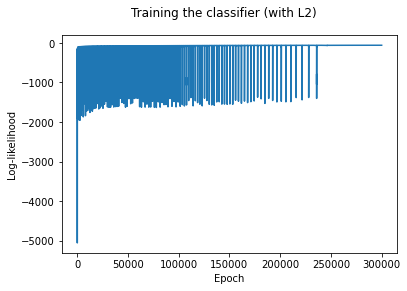

Accuracy of our LR classifier on training data: 0.9406593406593406
Accuracy of our LR classifier on testing data: 0.9385964912280702
Accuracy of scikit-learn's LR classifier on training data: 0.9516483516483516
Accuracy of scikit-learn's LR classifier on testing data: 0.9473684210526315


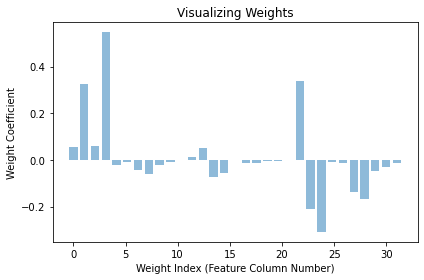

In [17]:
# logistic regression with L2 regularization
def l2_logistic_regression(features, labels, lr, epochs, l2_penalty):

	# add bias (intercept) with features matrix
	bias      = np.ones((features.shape[0], 1))
	features  = np.hstack((bias, features))

	# initialize the weight coefficients
	weights = np.zeros((features.shape[1], 1))

	logs = []

	# loop over epochs times
	for epoch in range(epochs):

		# predict probability for each row in the dataset
		predictions = predict_probability(features, weights)

		# calculate the indicator value
		indicators = (labels==+1)

		# calculate the errors
		errors = np.transpose(np.array([indicators])) - predictions

		# loop over each weight coefficient
		for j in range(len(weights)):

			isIntercept = (j==0)

			# calculate the derivative of jth weight cofficient
			derivative = l2_feature_derivative(errors, features[:,j], weights[j], l2_penalty, isIntercept)
			weights[j] += lr * derivative

		# compute the log-likelihood
		ll = l2_compute_log_likelihood(features, labels, weights, l2_penalty)
		logs.append(ll)

	import matplotlib.pyplot as plt
	x = np.linspace(0, len(logs), len(logs))
	fig = plt.figure()
	plt.plot(x, logs)
	fig.suptitle('Training the classifier (with L2)')
	plt.xlabel('Epoch')
	plt.ylabel('Log-likelihood')
	plt.show()

	return weights

# logistic regression without regularization
def lr_without_regularization():
	# hyper-parameters
	learning_rate = 1e-7
	epochs        = 500

	# perform logistic regression and get the learned weights
	learned_weights = logistic_regression(X_train, y_train, learning_rate, epochs)

	# make predictions using learned weights on testing data
	bias_train     = np.ones((X_train.shape[0], 1))
	bias_test      = np.ones((X_test.shape[0], 1))
	features_train = np.hstack((bias_train, X_train))
	features_test  = np.hstack((bias_test, X_test))

	test_predictions  = (predict_probability(features_test, learned_weights).flatten()>0.5)
	train_predictions = (predict_probability(features_train, learned_weights).flatten()>0.5)
	print("Accuracy of our LR classifier on training data: {}".format(accuracy_score(np.expand_dims(y_train, axis=1), train_predictions)))
	print("Accuracy of our LR classifier on testing data: {}".format(accuracy_score(np.expand_dims(y_test, axis=1), test_predictions)))

	# using scikit-learn's logistic regression classifier
	model = LogisticRegression(random_state=9)
	model.fit(X_train, y_train)
	sk_test_predictions  = model.predict(X_test)
	sk_train_predictions = model.predict(X_train)
	print("Accuracy of scikit-learn's LR classifier on training data: {}".format(accuracy_score(y_train, sk_train_predictions)))
	print("Accuracy of scikit-learn's LR classifier on testing data: {}".format(accuracy_score(y_test, sk_test_predictions)))

	#visualize_weights(np.squeeze(learned_weights), 'weights_without_l2.jpg')

# logistic regression with regularization
def lr_with_regularization():
	# hyper-parameters
	learning_rate = 1e-7
	epochs        = 300000
	l2_penalty    = 0.001

	# perform logistic regression and get the learned weights
	learned_weights = l2_logistic_regression(X_train, y_train, learning_rate, epochs, l2_penalty)

	# make predictions using learned weights on testing data
	bias_train     = np.ones((X_train.shape[0], 1))
	bias_test      = np.ones((X_test.shape[0], 1))
	features_train = np.hstack((bias_train, X_train))
	features_test  = np.hstack((bias_test, X_test))

	test_predictions  = (predict_probability(features_test, learned_weights).flatten()>0.5)
	train_predictions = (predict_probability(features_train, learned_weights).flatten()>0.5)
	print("Accuracy of our LR classifier on training data: {}".format(accuracy_score(np.expand_dims(y_train, axis=1), train_predictions)))
	print("Accuracy of our LR classifier on testing data: {}".format(accuracy_score(np.expand_dims(y_test, axis=1), test_predictions)))

	# using scikit-learn's logistic regression classifier
	model = LogisticRegression(random_state=9)
	model.fit(X_train, y_train)
	sk_test_predictions  = model.predict(X_test)
	sk_train_predictions = model.predict(X_train)
	print("Accuracy of scikit-learn's LR classifier on training data: {}".format(accuracy_score(y_train, sk_train_predictions)))
	print("Accuracy of scikit-learn's LR classifier on testing data: {}".format(accuracy_score(y_test, sk_test_predictions)))

	visualize_weights(np.squeeze(learned_weights), 'weights_with_l2.jpg')

# visualize weight coefficients
def visualize_weights(weights, title):
	import matplotlib.pyplot as plt
	x = np.linspace(0, len(weights), len(weights))

	fig = plt.figure()
	plt.bar(x, weights, align='center', alpha=0.5)
	plt.xlabel("Weight Index (Feature Column Number)")
	plt.ylabel("Weight Coefficient")
	plt.title('Visualizing Weights')
	plt.tight_layout()
	plt.show()

lr_with_regularization()